In [25]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt


In [26]:
rating = pd.read_csv('data/ratings.dat',delimiter="::")
rating.columns=['user_id','movie_id','rating','time']
rating.head()

/home/haiconmeo/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,user_id,movie_id,rating,time
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


<AxesSubplot:ylabel='Frequency'>

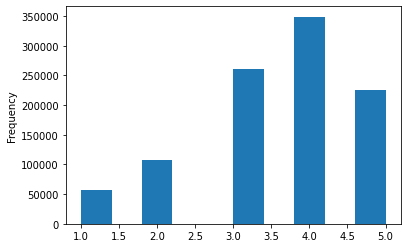

In [27]:
rating['rating'].plot.hist()

In [28]:
rating["user_id"].value_counts()

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
1844      20
5258      20
1664      20
5309      20
3021      20
Name: user_id, Length: 6040, dtype: int64

In [29]:
rating["movie_id"].value_counts()

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: movie_id, Length: 3706, dtype: int64

In [30]:
user = pd.read_csv('data/users.dat',delimiter="::")
user.columns=['user_id', 'gender','age','occupation', 'zip_code']
user.head()

/home/haiconmeo/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,user_id,gender,age,occupation,zip_code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


<AxesSubplot:ylabel='gender'>

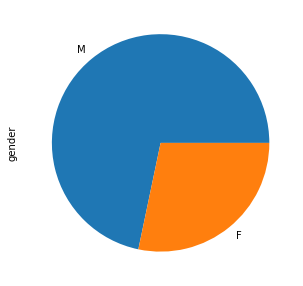

In [31]:
user['gender'].value_counts().plot.pie(y='mass', figsize=(5, 5))

<AxesSubplot:>

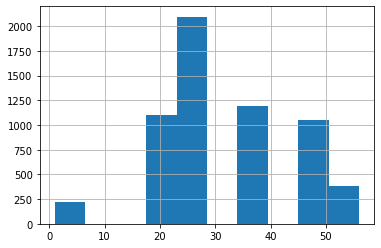

In [32]:
user['age'].hist()

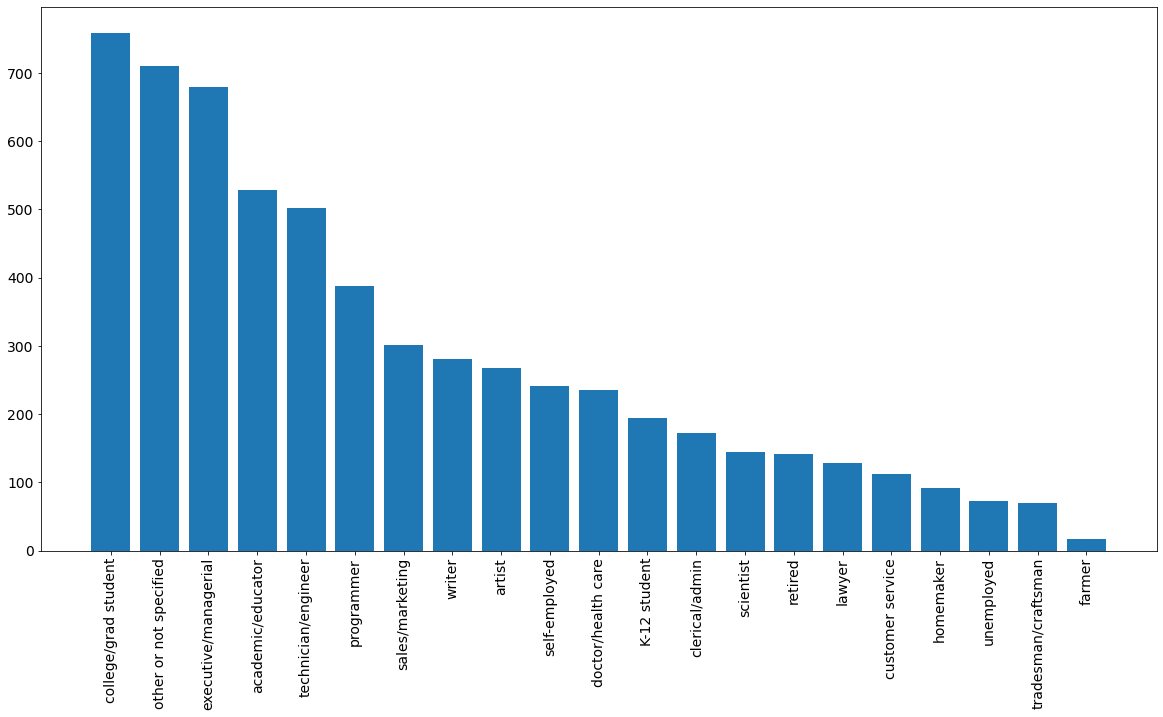

In [33]:
import matplotlib
occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

occupation_id_count = user["occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}


matplotlib.rcParams.update({"font.size": 14})
plt.figure(figsize=(20, 10))
plt.bar(x=occupation_count.keys(), height=occupation_count.values())
plt.xticks(rotation=90)
plt.show()

In [34]:
movies = pd.read_csv('data/movies.dat',delimiter="::", encoding='ISO-8859-1')
movies.columns=['movie_id','title','genres']

/home/haiconmeo/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [35]:
movies.head()

,movie_id,title,genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [36]:
movies["num_genres"] = movies["genres"].apply(lambda x: len(x.split('|')))
movies["num_genres"].value_counts()


1    2025
2    1322
3     420
4     100
5      14
6       1
Name: num_genres, dtype: int64

In [37]:
movies['year'] = movies["title"].str.extract('(\d\d\d\d)')
movies['year'].value_counts()

1996    344
1995    341
1998    335
1997    314
1999    281
       ... 
2010      1
9000      1
3000      1
2001      1
8230      1
Name: year, Length: 88, dtype: int64

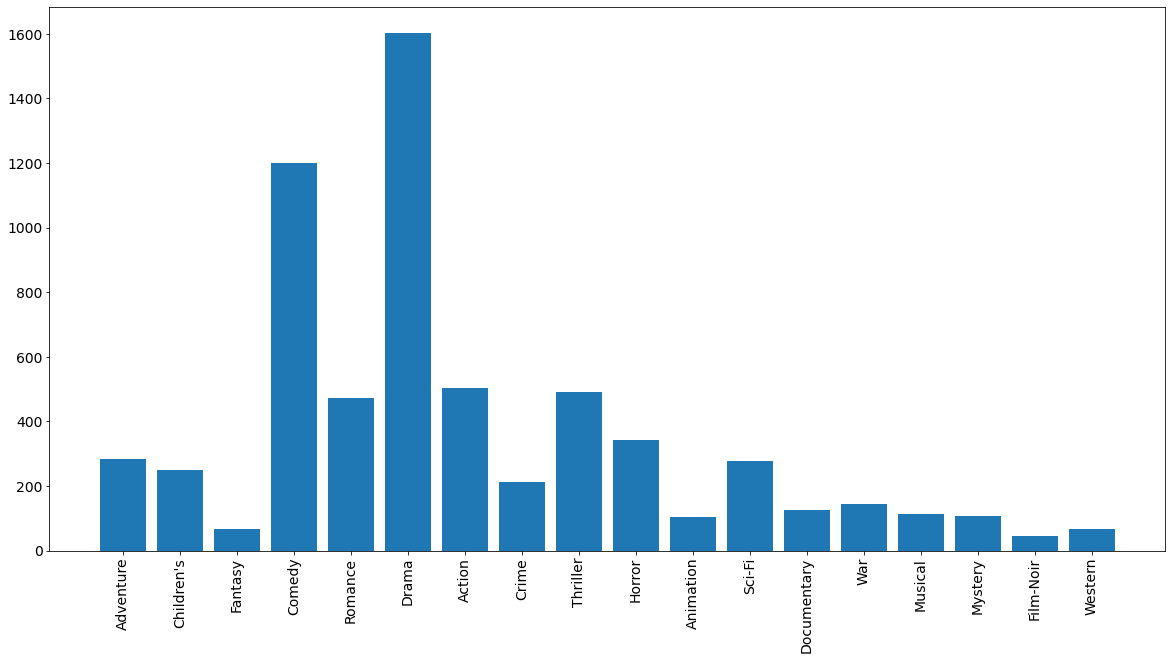

In [38]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies["genres"]:
    genres = genre_str.split('|')
    for genre in genres:
        genres_counter[genre] += 1
        
plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='gender'>

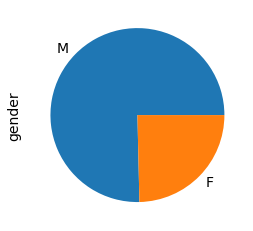

In [46]:
df_cd = pd.merge(rating, user, how='inner', on = 'user_id')
df_cd['gender'].value_counts().plot.pie()